In [1]:
from vacation.model import VCNN
from vacation.data import GalaxyDataset
import torch
import numpy as np
rng = np.random.default_rng(1337)

In [2]:
train_ds = GalaxyDataset(
    path="/scratch/tgross/vacation_data/Galaxy10_DECals_train.h5",
    device="cuda:1",
    max_cache_size="14G",
    cache_loaded=True,
    # index_collection=rng.integers(0, 16813, 10),
)

In [3]:
valid_ds = GalaxyDataset(
    path="/scratch/tgross/vacation_data/Galaxy10_DECals_valid.h5",
    device="cuda:1",
    max_cache_size="4G",
    cache_loaded=True,
    # index_collection=rng.integers(0, 4204, 5),
)

In [4]:
# valid_ds.plot_distribution()

In [5]:
model = VCNN(
    train_batch_size=1,
    valid_batch_size=1,
    out_channels=[4, 8, 10],
    dropout_rates=[0.0, 0.0, 0.0],
    lin_out_features=[300, 100],
    optimizer=torch.optim.AdamW,
    activation_func=torch.nn.PReLU,
    learning_rate=0.005,
    loss_func=torch.nn.CrossEntropyLoss,
    device="cuda:1"
)
model.init_data(train_dataset=train_ds, valid_dataset=valid_ds)

In [ ]:
model.train_epochs(n_epochs=40)

Training epoch 1:   0%|          | 0/16813 [00:00<?, ?it/s]

In [ ]:
model.save_state("./model1.pt")

In [2]:
model1 = VCNN.load("model1.pt", optimizer=torch.optim.AdamW, activation_func=torch.nn.PReLU, loss_func=torch.nn.CrossEntropyLoss, )

{'epoch': 5, 'img_size': 256, 'num_labels': 10, 'train_dataset': '/scratch/tgross/vacation_data/Galaxy10_DECals_train.h5', 'train_args': {'cache_loaded': True, 'index_collection': array([ 9185, 14763, 12223,  3119,  9082, 15483,  6582, 15914,  4867,
       14703]), 'end_index': -1, 'max_cache_size': 14000000000, 'cache_cleaning_policy': 'oldest'}, 'valid_dataset': '/scratch/tgross/vacation_data/Galaxy10_DECals_valid.h5', 'valid_args': {'cache_loaded': True, 'index_collection': array([1940,  486,  251,  814,  693]), 'end_index': -1, 'max_cache_size': 4000000000, 'cache_cleaning_policy': 'oldest'}, 'train_batch_size': 1, 'valid_batch_size': 1, 'out_channels': [4, 8, 10], 'dropout_rates': [0.0, 0.0, 0.0], 'lin_out_features': [300, 100], 'optimizer': "<class 'torch.optim.adamw.AdamW'>", 'activation_func': "<class 'torch.nn.modules.activation.PReLU'>", 'lr': 0.005, 'loss_func': "<class 'torch.nn.modules.loss.CrossEntropyLoss'>", 'model_state_dict': OrderedDict({'0.weight': tensor([[[[-9.540

In [6]:
model1.train_epochs(1)

Training epoch 1:   0%|          | 0/10 [00:00<?, ?it/s]

TypeError: expected Tensor as element 0 in argument 0, but got numpy.ndarray

In [3]:
import matplotlib.pyplot as plt

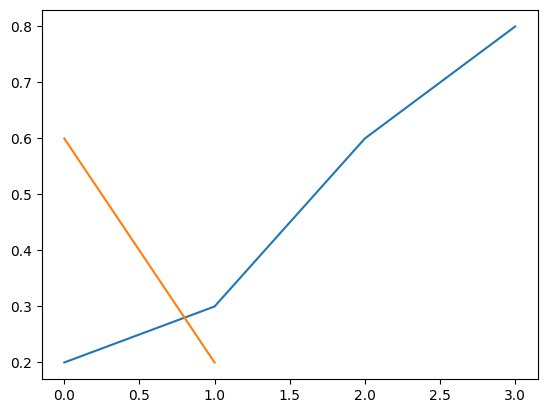

In [5]:
plt.plot(model1._metrics["accuracy"].train_vals)
plt.plot(model1._metrics["accuracy"].valid_vals)

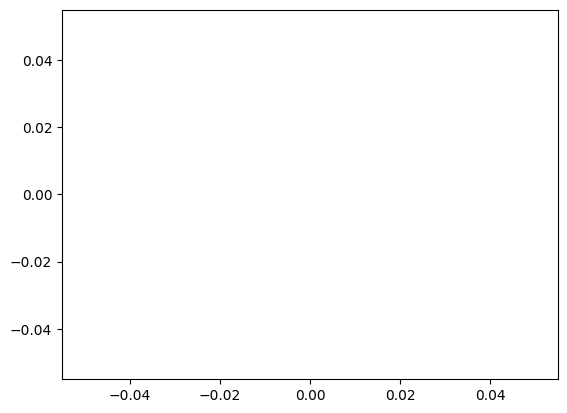

In [10]:
plt.plot(model._loss_metric.train_vals)
plt.plot(model._loss_metric.valid_vals)